In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate Cities List---------------------------------------------------

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [4]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [6]:
#Perform API Calls-------------------------------------------

In [5]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
        

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : at-bashi
Processing Record 2 of Set 1 : busselton
Processing Record 3 of Set 1 : mar del plata
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : provideniya
Processing Record 6 of Set 1 : moron
Processing Record 7 of Set 1 : yulara
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : tuktoyaktuk
Processing Record 10 of Set 1 : albany
Processing Record 11 of Set 1 : ilhabela
Processing Record 12 of Set 1 : kaitangata
Processing Record 13 of Set 1 : mataura
Processing Record 14 of Set 1 : klaksvik
City not found. Skipping...
Processing Record 15 of Set 1 : mbuji-mayi
Processing Record 16 of Set 1 : evensk
Processing Record 17 of Set 1 : hermanus
City not found. Skipping...
Processing Record 18 of Set 1 : new norfolk
Processing Record 19 of Set 1 : clyde river
Processing Record 20 of Set 1 : half moon bay
Processing Record 21 of Set 1 : talnakh
City not found.

In [ ]:
#Convert Raw Data to DataFrame---------------------------------------

In [6]:
#Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [7]:
#Count weather data
weather_data.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Clouds        541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [8]:
#Display dataframe
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,At-Bashi,41.17,75.81,57.88,36,0,2.28,KG,1592617018
1,Busselton,-33.65,115.33,52.00,64,0,11.68,AU,1592616867
2,Mar del Plata,-38.00,-57.56,54.00,93,0,9.17,AR,1592616878
3,Punta Arenas,-53.15,-70.92,35.60,93,92,14.99,CL,1592616876
4,Provideniya,64.38,-173.30,59.49,40,13,6.38,RU,1592616873


In [19]:
#Save weather data to a cities csv file
weather_data.to_csv("output_data/cities.csv", index=False)

In [13]:
#Plotting the Data------------------------------------------------

In [14]:
# Latitude vs. Temperature Plot-----------------------------------

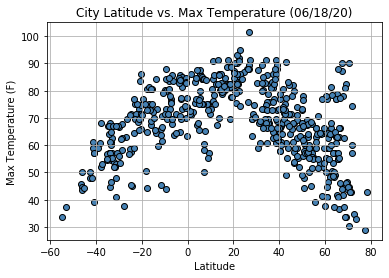

In [20]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

In [15]:
#Latitude vs. Humidity Plot----------------------------------------

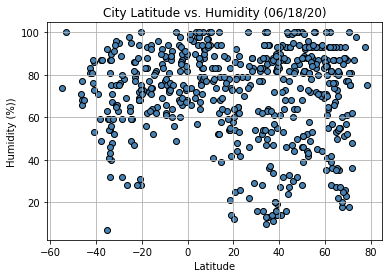

In [21]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

In [ ]:
# Latitude vs. Cloudiness Plot----------------------------------

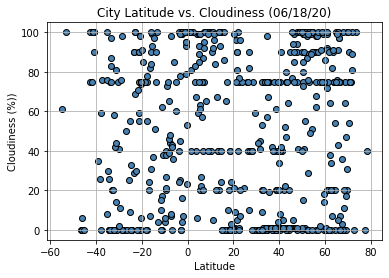

In [22]:
#Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

In [ ]:
# Latitude vs. Wind Speed Plot------------------------------------

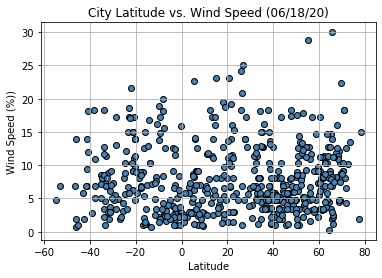

In [23]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")